# Stock Market Sentiment Analysis  

Resources used:   

https://www.youtube.com/watch?v=QpzMWQvxXWk  
https://medium.com/the-handbook-of-coding-in-finance/sentiment-analysis-of-stock-market-in-python-part-1-web-scraping-financial-news-51b7f603f320   
Regex101 to better work with regular expressions.

# Importing Libraries 

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style("darkgrid")
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (15, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

import warnings
warnings.simplefilter(action='ignore')

import spacy 

import requests 
from bs4 import BeautifulSoup 
import re

# Extracting HTML Contents  

It will be used the website: https://finviz.com/

Finding the user agent.

In [3]:
user_agent = 'You can find it by typing "My user agent" in the search bar of your browser'

In [4]:
company = 'AAPL' 
url = 'https://finviz.com/quote.ashx?t={}&p=d'.format(company)
request = requests.get(url, headers={'User-Agent':user_agent}) 

Checking the URL

In [5]:
url

'https://finviz.com/quote.ashx?t=AAPL&p=d'

Checking whether the request was created properly. 

In [6]:
request.ok

True

# Parsing the Web Content 

In [7]:
parser = BeautifulSoup(request.text, 'html.parser') 
news_html = parser.find_all('a',{'class':'tab-link-news'})
news_html[:2]

[<a class="tab-link-news" href="https://finance.yahoo.com/news/gm-plans-phase-apple-carplay-140319001.html" onclick="trackAndOpenNews(event, 'Reuters', 'https://finance.yahoo.com/news/gm-plans-phase-apple-carplay-140319001.html');" rel="nofollow" target="_blank">GM plans to phase out Apple CarPlay in EVs, with Google's help</a>,
 <a class="tab-link-news" href="https://finance.yahoo.com/m/ee5a6876-747d-3e36-9caf-8e2b34d91721/apple-is-still-a-buy-despite.html" onclick="trackAndOpenNews(event, 'Motley Fool', 'https://finance.yahoo.com/m/ee5a6876-747d-3e36-9caf-8e2b34d91721/apple-is-still-a-buy-despite.html');" rel="nofollow" target="_blank">Apple Is Still a Buy Despite Market Rumors of an Impending Recession</a>]

In order to take only the news, it is possible to use a regular expression.  
It seems that the news'contents are included between target="_blank" and </a>.

In [8]:
regex = "target=\"_blank\"\>(.*)\<\/a\>"
regex_news = [re.findall(regex, str(sentence)) for sentence in news_html]
regex_news

[["GM plans to phase out Apple CarPlay in EVs, with Google's help"],
 ['Apple Is Still a Buy Despite Market Rumors of an Impending Recession'],
 ['3 Things About Apple That Smart Investors Know'],
 ['US Appeals Court Rules In Favor Of Apple In Patent Infringement Case Against VirnetX'],
 ['Which Is the Better Dividend Stock: Viatris or Apple?'],
 ['Apple Stores Worst Deals? Employees Reveal 3 Tactics That Make You Spend More Money'],
 ['How Much Amazon, Apple, Meta and the Biggest Tech Companies Are Worth'],
 ["Why Isn't Warren Buffett Buying Microsoft Stock Hand Over Fist?"],
 ['The first quarter of the year sent investors back to the future: Morning Brief'],
 ["87% of Warren Buffett's More Than $6.1 Billion in Dividend Income Comes From These 7 Stocks"],
 ['Streaming platforms vie for MLB broadcast deals this season as opening day takes the plate'],
 ["'The odds are definitely growing' for a possible TikTok ban in the U.S.: Analyst"],
 ['An Analyst Offers a New Reason Why Apple Shoul

Storing the news into a dataframe.

In [9]:
# Creating the Lists to Append

news_list = []

for x in regex_news:
    news_list.append(x[0])


# Creating the Dictionary 

news_dict = {}
news_dict['Company'] = company
news_dict['News'] = news_list 

# Converting into a Dataframe 
apple = pd.DataFrame(news_dict)

In [10]:
apple

,Company,News
0,AAPL,"GM plans to phase out Apple CarPlay in EVs, wi..."
1,AAPL,Apple Is Still a Buy Despite Market Rumors of ...
2,AAPL,3 Things About Apple That Smart Investors Know
3,AAPL,US Appeals Court Rules In Favor Of Apple In Pa...
4,AAPL,Which Is the Better Dividend Stock: Viatris or...
...,...,...
95,AAPL,3 Warren Buffett Stocks That Are Crushing the ...
96,AAPL,"Apple CEO praises China's innovation, long his..."
97,AAPL,Apple CEO Cook Stresses Ties With China at Bei...
98,AAPL,Weekly Roundup


# Storing the Process into a Function 

In [11]:
def company_news(firm): 
    user_agent = 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/111.0.0.0 Safari/537.36'
    url = 'https://finviz.com/quote.ashx?t={}&p=d'.format(firm)
    request = requests.get(url, headers={'User-Agent':user_agent})
    parser = BeautifulSoup(request.text, 'html.parser') 
    news_html = parser.find_all('a',{'class':'tab-link-news'})
    regex = "target=\"_blank\">(.*?)<\/a>" 
    regex_news = [re.findall(regex, str(sentence)) for sentence in news_html] 

    # Creating the Lists to Append

    news_list = []
    for x in regex_news:
        news_list.append(x[0])

    # Creating the Dictionary 

    news_dict = {} 
    news_dict['Company'] = firm
    news_dict['News'] = news_list 

    # Converting into a Dataframe 

    final_df = pd.DataFrame(news_dict)
    return final_df 

In [12]:
microsoft_df = company_news('MSFT')
microsoft_df

,Company,News
0,MSFT,Italy temporarily bans ChatGPT over privacy co...
1,MSFT,Sharing patient data is something to be celebr...
2,MSFT,Investors Heavily Search Microsoft Corporation...
3,MSFT,Column: Afraid of AI? The startups selling it ...
4,MSFT,25 Best Free PC Games of 2023
...,...,...
95,MSFT,Is AMD Stock a Buy?
96,MSFT,Europol sounds alarm about criminal use of Cha...
97,MSFT,Microsoft (MSFT) Might Block AI Rivals From Us...
98,MSFT,Is Salesforce Stock A Buy As Activist Investor...


Creating a Dataframe with 5 companies from different sectors:  

- **Amazon** --> AMZN  
- **Netflix** --> NFLX  
- **Intel Corporation** --> INTC  
- **Tesla** --> TSLA  
- **Eni** --> E

Creating a unique dataframe for all of them.

In [13]:
companies_df = pd.DataFrame()
tickers = ['AMZN', 'NFLX', 'INTC', 'TSLA', 'E']

for c in tickers: 
    new_df = company_news(c)
    companies_df = pd.concat([companies_df, new_df])

In [14]:
companies_df

,Company,News
0,AMZN,Amazon Adds a Warning Shoppers Will Really Love
1,AMZN,3 Top E-Commerce Stocks to Buy Right Now
2,AMZN,The first quarter of the year sent investors b...
3,AMZN,5 Bargain-Basement Stocks to Buy Right Now
4,AMZN,Why Amazon Stock Shot Nearly 2% Higher Today
...,...,...
95,E,"Zacks Industry Outlook Highlights Exxon Mobil,..."
96,E,5 Energy Stocks From the Promising Integrated ...
97,E,Eni SpA (E) Gains As Market Dips: What You Sho...
98,E,Here is Why Growth Investors Should Buy Eni Sp...


Checking whether there are 100 news per company.

In [15]:
companies_df.Company.value_counts()

AMZN    100
NFLX    100
INTC    100
TSLA    100
E       100
Name: Company, dtype: int64

Resetting the Index

In [16]:
companies_df = companies_df.reset_index().drop(columns='index')
companies_df

,Company,News
0,AMZN,Amazon Adds a Warning Shoppers Will Really Love
1,AMZN,3 Top E-Commerce Stocks to Buy Right Now
2,AMZN,The first quarter of the year sent investors b...
3,AMZN,5 Bargain-Basement Stocks to Buy Right Now
4,AMZN,Why Amazon Stock Shot Nearly 2% Higher Today
...,...,...
495,E,"Zacks Industry Outlook Highlights Exxon Mobil,..."
496,E,5 Energy Stocks From the Promising Integrated ...
497,E,Eni SpA (E) Gains As Market Dips: What You Sho...
498,E,Here is Why Growth Investors Should Buy Eni Sp...


Random checking if all the news are reported correctly.

In [17]:
companies_df.News[58]

'Amazon AWS Joins the AI Party and Announces New Nvidia Infrastructure Is Coming'

In [18]:
companies_df.News[321]

'Tesla Used-Car Data Are Good for the Stock'

In [19]:
companies_df.News[220]

'Why Intel, Qualcomm, and Taiwan Semiconductor Manufacturing Rallied Today'

# Applying Sentiment Analysis   

It will be used the roBERTa model from HuggingFace.

In [20]:
from transformers import AutoTokenizer 
from transformers import AutoModelForSequenceClassification 
from scipy.special import softmax 

In [21]:
pre_trained_model = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(pre_trained_model)
model = AutoModelForSequenceClassification.from_pretrained(pre_trained_model)

Encoding text. It will be used a PyTorch Tensor for making the model working properly. 

In [22]:
def roberta_scores(row):
    try: 
        # Tokenizing the text and putting it into the model 

        tokenized_text = tokenizer(row['News'], return_tensors='pt')
        model_output = model(**tokenized_text)

        # Taking only the scores from the Tensors and putting them in a NumPy array 
        
        scores = model_output[0][0].detach().numpy() 

        # Applying the Softmax function to obtain the probability distribution 

        scores = softmax(scores) 

        # Storing the results into a dictionary 

        scores_dict = {
            'negative_score':scores[0],
            'neutral_score':scores[1],
            'positive_score':scores[2] 
        }

        return scores_dict 
    except:
        return 'Text too big'

Applying the function to the "News" variable of the "companies_df".

In [23]:
companies_df['Sentiment_Scores'] = companies_df.apply(roberta_scores, axis=1)

In [24]:
companies_df 

,Company,News,Sentiment_Scores
0,AMZN,Amazon Adds a Warning Shoppers Will Really Love,"{'negative_score': 0.009421064, 'neutral_score..."
1,AMZN,3 Top E-Commerce Stocks to Buy Right Now,"{'negative_score': 0.00943878, 'neutral_score'..."
2,AMZN,The first quarter of the year sent investors b...,"{'negative_score': 0.0035974341, 'neutral_scor..."
3,AMZN,5 Bargain-Basement Stocks to Buy Right Now,"{'negative_score': 0.020916877, 'neutral_score..."
4,AMZN,Why Amazon Stock Shot Nearly 2% Higher Today,"{'negative_score': 0.00399428, 'neutral_score'..."
...,...,...,...
495,E,"Zacks Industry Outlook Highlights Exxon Mobil,...","{'negative_score': 0.010740134, 'neutral_score..."
496,E,5 Energy Stocks From the Promising Integrated ...,"{'negative_score': 0.03108356, 'neutral_score'..."
497,E,Eni SpA (E) Gains As Market Dips: What You Sho...,"{'negative_score': 0.037193075, 'neutral_score..."
498,E,Here is Why Growth Investors Should Buy Eni Sp...,"{'negative_score': 0.012144469, 'neutral_score..."


Creating a columns for each score.

In [25]:
sentiment_dict = {}

for index, news in zip(companies_df.index, companies_df.Sentiment_Scores):
    sentiment_dict[index] = news 

sentiment_dict

{0: {'negative_score': 0.009421064,
  'neutral_score': 0.14996591,
  'positive_score': 0.84061307},
 1: {'negative_score': 0.00943878,
  'neutral_score': 0.7341834,
  'positive_score': 0.25637782},
 2: {'negative_score': 0.0035974341,
  'neutral_score': 0.4999522,
  'positive_score': 0.49645048},
 3: {'negative_score': 0.020916877,
  'neutral_score': 0.84100795,
  'positive_score': 0.1380751},
 4: {'negative_score': 0.00399428,
  'neutral_score': 0.19986825,
  'positive_score': 0.79613745},
 5: {'negative_score': 0.041208755,
  'neutral_score': 0.9041199,
  'positive_score': 0.054671295},
 6: {'negative_score': 0.013996111,
  'neutral_score': 0.24835204,
  'positive_score': 0.7376517},
 7: {'negative_score': 0.013675001,
  'neutral_score': 0.46830657,
  'positive_score': 0.51801836},
 8: {'negative_score': 0.11699365,
  'neutral_score': 0.8215755,
  'positive_score': 0.06143082},
 9: {'negative_score': 0.61019385,
  'neutral_score': 0.37768775,
  'positive_score': 0.012118343},
 10: {'

In [26]:
pd.DataFrame(sentiment_dict)

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
negative_score,0.009421,0.009439,0.003597,0.020917,0.003994,0.041209,0.013996,0.013675,0.116994,0.610194,...,0.018928,0.189576,0.002145,0.175541,0.303826,0.010740,0.031084,0.037193,0.012144,0.421548
neutral_score,0.149966,0.734183,0.499952,0.841008,0.199868,0.904120,0.248352,0.468307,0.821576,0.377688,...,0.946838,0.788602,0.147636,0.774342,0.661145,0.806292,0.866747,0.873099,0.613072,0.551563
positive_score,0.840613,0.256378,0.496450,0.138075,0.796137,0.054671,0.737652,0.518018,0.061431,0.012118,...,0.034234,0.021822,0.850219,0.050117,0.035029,0.182967,0.102169,0.089708,0.374783,0.026889


Transposing it.

In [27]:
sentiment_df = pd.DataFrame(sentiment_dict).T
sentiment_df

,negative_score,neutral_score,positive_score
0,0.009421,0.149966,0.840613
1,0.009439,0.734183,0.256378
2,0.003597,0.499952,0.496450
3,0.020917,0.841008,0.138075
4,0.003994,0.199868,0.796137
...,...,...,...
495,0.010740,0.806292,0.182967
496,0.031084,0.866747,0.102169
497,0.037193,0.873099,0.089708
498,0.012144,0.613072,0.374783


Merging the two dataframes.

In [28]:
final_df = companies_df.merge(sentiment_df, left_index=True, right_index=True) 
final_df

,Company,News,Sentiment_Scores,negative_score,neutral_score,positive_score
0,AMZN,Amazon Adds a Warning Shoppers Will Really Love,"{'negative_score': 0.009421064, 'neutral_score...",0.009421,0.149966,0.840613
1,AMZN,3 Top E-Commerce Stocks to Buy Right Now,"{'negative_score': 0.00943878, 'neutral_score'...",0.009439,0.734183,0.256378
2,AMZN,The first quarter of the year sent investors b...,"{'negative_score': 0.0035974341, 'neutral_scor...",0.003597,0.499952,0.496450
3,AMZN,5 Bargain-Basement Stocks to Buy Right Now,"{'negative_score': 0.020916877, 'neutral_score...",0.020917,0.841008,0.138075
4,AMZN,Why Amazon Stock Shot Nearly 2% Higher Today,"{'negative_score': 0.00399428, 'neutral_score'...",0.003994,0.199868,0.796137
...,...,...,...,...,...,...
495,E,"Zacks Industry Outlook Highlights Exxon Mobil,...","{'negative_score': 0.010740134, 'neutral_score...",0.010740,0.806292,0.182967
496,E,5 Energy Stocks From the Promising Integrated ...,"{'negative_score': 0.03108356, 'neutral_score'...",0.031084,0.866747,0.102169
497,E,Eni SpA (E) Gains As Market Dips: What You Sho...,"{'negative_score': 0.037193075, 'neutral_score...",0.037193,0.873099,0.089708
498,E,Here is Why Growth Investors Should Buy Eni Sp...,"{'negative_score': 0.012144469, 'neutral_score...",0.012144,0.613072,0.374783


# EDA  

In [29]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           500 non-null    object 
 1   News              500 non-null    object 
 2   Sentiment_Scores  500 non-null    object 
 3   negative_score    500 non-null    float32
 4   neutral_score     500 non-null    float32
 5   positive_score    500 non-null    float32
dtypes: float32(3), object(3)
memory usage: 17.7+ KB


Checking the average values for each company.

In [30]:
final_df.groupby('Company')[['negative_score', 'neutral_score', 'positive_score']].mean()

,negative_score,neutral_score,positive_score
Company,,,
AMZN,0.143925,0.497194,0.358881
E,0.099289,0.687596,0.213116
INTC,0.140033,0.580089,0.279878
NFLX,0.098427,0.572852,0.328722
TSLA,0.174532,0.531944,0.293524


The neutral score appears to be dominant in this case.  

Overall, the average negative score is always lower than the positive one.

Checking the different scores'distirbution.

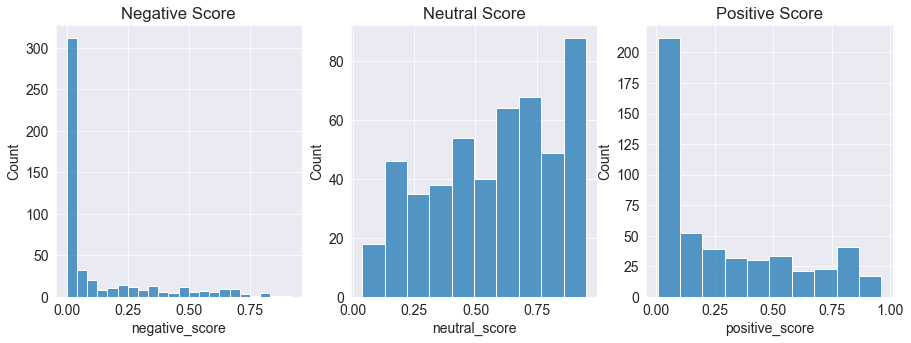

In [31]:
fig, ax = plt.subplots(1,3)

ax[0].set_title('Negative Score')
sns.histplot(data=final_df, x='negative_score', ax=ax[0])

ax[1].set_title('Neutral Score')
sns.histplot(data=final_df, x='neutral_score', ax=ax[1])

ax[2].set_title('Positive Score')
sns.histplot(data=final_df, x='positive_score', ax=ax[2]);

Both positive and negative scores appear to be right-skewed, on the contrary the neutral score is left-skewed.

Checking the best and the worst news.

In [32]:
final_df.sort_values('positive_score', ascending=False)[['News', 'positive_score']]

,News,positive_score
479,Eni SpA (E) is an Incredible Growth Stock: 3 R...,0.961236
362,"For Tesla, This Is the Most Important Delivery...",0.960551
141,Apple Has a Billion-Dollar Blockbuster Idea Mo...,0.955308
96,"Amazon.com, Inc. (NASDAQ:AMZN) is a favorite a...",0.954052
27,"Best Streaming Devices: Google Chromecast, App...",0.948807
...,...,...
352,UPDATE 2-Ex-Tesla worker testifies that race b...,0.009789
465,Hackers Hit Italian Oil Giant Enis Computer Ne...,0.008905
284,"The Worst Is Over For PC, Smartphone Chip Stoc...",0.008291
356,Ex-Tesla worker testifies that race bias made ...,0.007987


In [33]:
final_df.News[479]

'Eni SpA (E) is an Incredible Growth Stock: 3 Reasons Why'

Probably here words like "incredible" and "growth" had a great influence on the final result. 

In [34]:
final_df.sort_values('negative_score', ascending=False)[['News', 'negative_score']]

,News,negative_score
296,7 Terrible Tech Stocks to Sell in March,0.917759
284,"The Worst Is Over For PC, Smartphone Chip Stoc...",0.864621
344,Elon Musk's Boring Co. Neighbors Have Big Fear...,0.833369
376,Tesla Rival Lucid Has Really Bad News About It...,0.825282
356,Ex-Tesla worker testifies that race bias made ...,0.818057
...,...,...
27,"Best Streaming Devices: Google Chromecast, App...",0.001295
208,"These Stocks Are Moving the Most Today: Intel,...",0.001176
172,Warner Bros. Discovery's (WBD) Batman Series W...,0.001172
133,These Stocks Moved the Most Today: Deutsche Ba...,0.001103


In [47]:
final_df.loc[284, 'negative_score']

0.86462146

In [46]:
final_df.News[284]

'The Worst Is Over For PC, Smartphone Chip Stocks, Analyst Says'

Here the model does not seem to have well captured the sentence's meaning. It interpreted words like "worst" and "over" as a negative aspect, while the news was good for the company.

# Conclusion   

As a preliminary analysis, from my point of view, the most difficult part was the webscraping phase. Many sites have a really complex structure and it is quite difficult to inspect them well.  
Further improvements can be done in the future by including people's opinions, for example by including tweets.